<a href="https://colab.research.google.com/github/Mutasar/sewa-sepeda/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Mutasar]
- **Email:** [mutasarstmik@gmail.com]
- **ID Dicoding:** [l319ywd083]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
"bagaimana tren musiman penggunaan sepeda mempengaruhi berdasarkan pola waktu"

- Pertanyaan 2
"bagaimana perbedaan perilaku antara pengguna terdaftar dan pengguna sementara.


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from google.colab import files

## Data Wrangling

### Gathering Data

In [3]:
# Memuat tabel day
day_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/day.csv")
display(day_df)

hour_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/hour.csv")
display(hour_df)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- xxx
- xxx

### Assessing Data

In [4]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [5]:
# mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
# memeriksa duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [7]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()
hour_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kualitas Data yang Baik untuk Analisis Lanjutan. Berdasarkan hasil pemeriksaan awal terhadap dataset day_df dan hour_df, dapat disimpulkan bahwa kualitas data secara umum cukup baik untuk melanjutkan analisis. Tidak ditemukan adanya missing value atau duplikasi data pada kedua dataset. Hal ini menunjukkan integritas data yang tinggi dan meminimalkan kebutuhan untuk melakukan penanganan data yang kompleks terkait dengan nilai yang hilang atau data ganda. Dengan demikian, kita dapat langsung fokus pada eksplorasi dan analisis pola penggunaan sepeda tanpa terhambat oleh masalah kualitas data dasar.

- Karakteristik Variabel Numerik yang Bervariasi Hasil ringkasan statistik deskriptif (describe()) untuk variabel numerik pada kedua dataset memberikan gambaran awal tentang sebaran data. Kita bisa melihat adanya variasi dalam nilai minimum, maksimum, rata-rata, dan standar deviasi untuk kolom-kolom seperti temp, atemp, hum, dan windspeed. Variasi ini menunjukkan bahwa kondisi lingkungan seperti suhu, kelembaban, dan kecepatan angin memiliki rentang nilai yang beragam sepanjang periode data. Selain itu, statistik untuk kolom casual, registered, dan cnt (jumlah total sewa) memberikan gambaran awal tentang skala penggunaan sepeda oleh pengguna kasual dan terdaftar. Informasi ini akan sangat berguna dalam analisis mendalam untuk memahami faktor-faktor yang mempengaruhi jumlah sewa dan membandingkan perilaku pengguna dari kedua kategori tersebut.

### Cleaning Data

In [9]:
# Mengubah tipe data kolom kategorikal
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')


In [10]:
hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')


In [11]:
# Mengubah tipe data kolom tanggal
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(4), datetime64

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [14]:
# Mengubah nama kolom pada day_df
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'dteday': 'date',
    'weathersit': 'weather',
    'cnt': 'total_rentals',
    'casual': 'casual_users',
    'registered': 'registered_users'
}, inplace=True)

# Mengubah nama kolom pada hour_df
hour_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'dteday': 'date',
    'weathersit': 'weather',
    'cnt': 'total_rentals',
    'casual': 'casual_users',
    'registered': 'registered_users'
}, inplace=True)

In [15]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual_users,registered_users,total_rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
hour_df.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual_users,registered_users,total_rentals
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
# Mengkonversi isi kolom agar mudah dipahami
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

<ipython-input-17-9f8ca69bbbd2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-17-9f8ca69bbbd2>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), i

In [18]:
# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

In [ ]:
# Mapping hari
day_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Replace kolom weekday di kedua DataFrame
day_df['weekday'].replace(day_map, inplace=True)
hour_df['weekday'].replace(day_map, inplace=True)

<ipython-input-36-c2bd7b98eb70>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['weekday'].replace(day_map, inplace=True)
<ipython-input-36-c2bd7b98eb70>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [19]:
# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)



<ipython-input-19-8f0cf257ff4c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.year.replace((0,1), ('2011','2012'), inplace=True)
<ipython-input-19-8f0cf257ff4c>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.year.replace((0,1), ('2011','2012'), inplace=True)
<ipython-input-19-8f0cf257ff4c>:3: Futu

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
#parameter dari data hour_df
hour_df.describe(include="all")

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual_users,registered_users,total_rentals
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,NaN,NaN,NaN,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [22]:
#parameter dari data day_df
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual_users,registered_users,total_rentals
count,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,NaN,NaN,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [23]:
# penyewaan berdasarkan day
day_df.groupby(by="date").agg({
    "total_rentals": ["sum"]
})

,total_rentals
,sum
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095


In [24]:
#parameter dari data hour_df
hour_df.describe(include="all")

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual_users,registered_users,total_rentals
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,NaN,NaN,NaN,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [25]:
# Ringkasan statistik untuk day_df
print("Ringkasan Statistik day_df:")
print(day_df.describe())

Ringkasan Statistik day_df:
          instant                 date     holiday     weekday  workingday  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.028728    2.997264    0.683995   
min      1.000000  2011-01-01 00:00:00    0.000000    0.000000    0.000000   
25%    183.500000  2011-07-02 12:00:00    0.000000    1.000000    0.000000   
50%    366.000000  2012-01-01 00:00:00    0.000000    3.000000    1.000000   
75%    548.500000  2012-07-01 12:00:00    0.000000    5.000000    1.000000   
max    731.000000  2012-12-31 00:00:00    1.000000    6.000000    1.000000   
std    211.165812                  NaN    0.167155    2.004787    0.465233   

             temp       atemp         hum   windspeed  casual_users  \
count  731.000000  731.000000  731.000000  731.000000    731.000000   
mean     0.495385    0.474354    0.627894    0.190486    848.176471   
min      0.059130    0.079070    0.000000    0.022392   

In [26]:
# Ringkasan statistik untuk hour_df
print("\nRingkasan Statistik hour_df:")
print(hour_df.describe())


Ringkasan Statistik hour_df:
          instant                           date            hr       holiday  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568     11.546752      0.028770   
min        1.0000            2011-01-01 00:00:00      0.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      6.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00     12.000000      0.000000   
75%    13034.5000            2012-07-02 00:00:00     18.000000      0.000000   
max    17379.0000            2012-12-31 00:00:00     23.000000      1.000000   
std     5017.0295                            NaN      6.914405      0.167165   

            weekday    workingday          temp         atemp           hum  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      0.496987      0.475775      0.627229   
min        0

In [27]:
# Ringkasan statistik untuk kolom non-numerik
print("\nRingkasan Statistik Kolom Non-Numerik day_df:")
print(day_df.describe(include='category'))



Ringkasan Statistik Kolom Non-Numerik day_df:
       season  year month  weather
count     731   731   731      731
unique      4     2    12        3
top      Fall  2012   Jan        1
freq      188   366    62      463


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

"Bagaimana tren musiman penggunaan sepeda memengaruhi berdasarkan pola waktu ?"

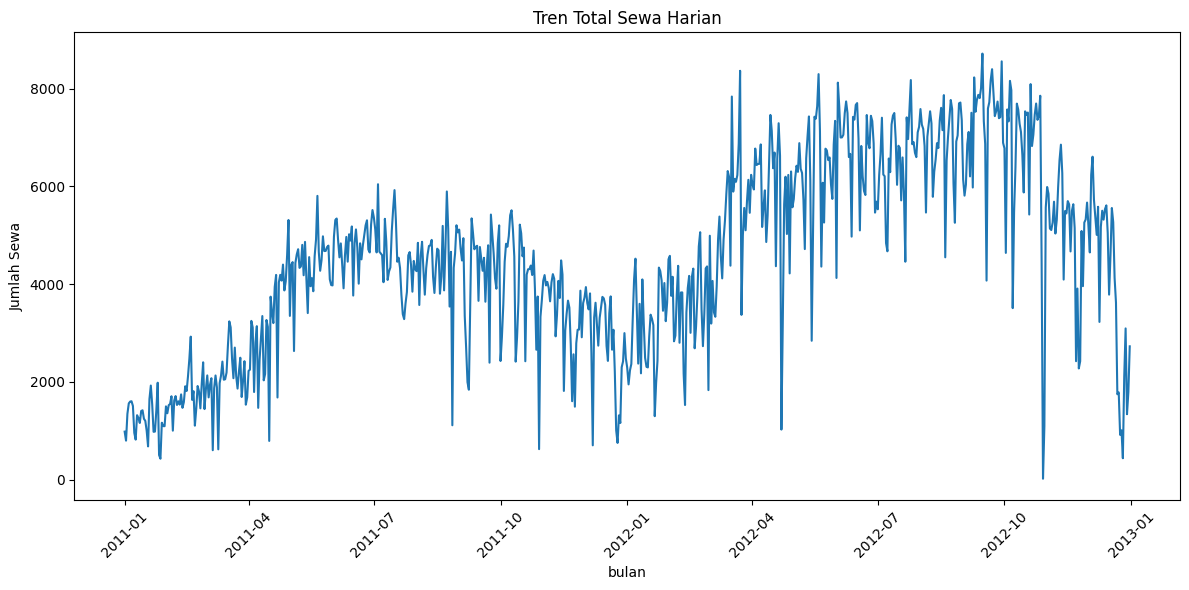

In [37]:
# Visualisasi Tren Harian dari Waktu ke Waktu
# Ini akan menunjukkan tren penggunaan sepeda sepanjang periode dataset
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_rentals', data=day_df)
plt.title('Tren Total Sewa Harian')
plt.xlabel('bulan')
plt.ylabel('Jumlah Sewa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pertanyaan 2:

"Apa perbedaan perilaku antara pengguna terdaftar dan pengguna sementara ?

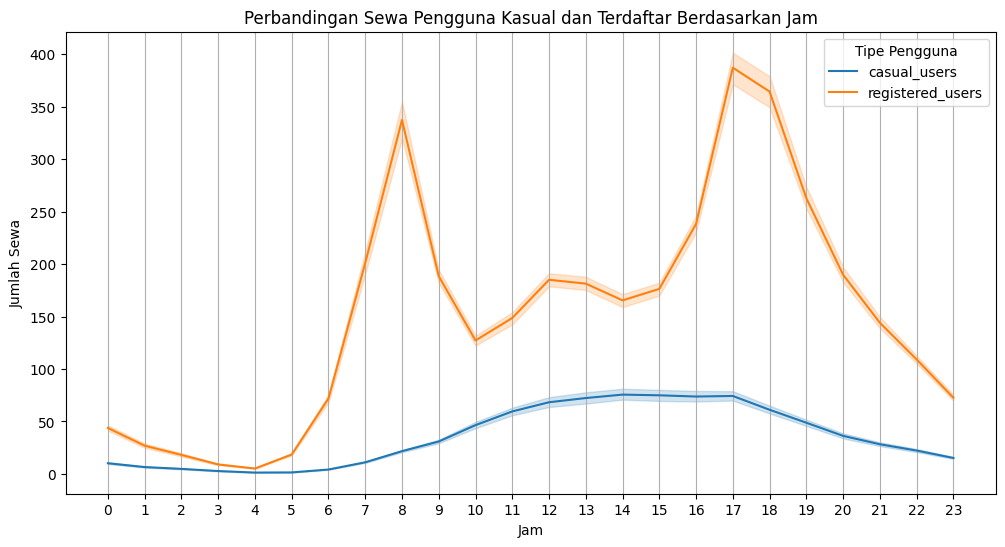

In [40]:
# Menggabungkan data casual dan registered ke dalam satu kolom untuk visualisasi perbandingan yang lebih mudah
day_df_users = day_df.melt(id_vars=['date', 'season', 'month', 'year', 'weekday'],
                           value_vars=['casual_users', 'registered_users'],
                           var_name='user_type',
                           value_name='rental_count')

hour_df_users = hour_df.melt(id_vars=['date', 'season', 'month', 'year', 'weekday', 'hr'],
                           value_vars=['casual_users', 'registered_users'],
                           var_name='user_type',
                           value_name='rental_count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='rental_count', hue='user_type', data=hour_df_users)
plt.title('Perbandingan Sewa Pengguna Kasual dan Terdaftar Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sewa')
plt.xticks(range(0, 24)) # Menampilkan semua jam
plt.grid(axis='x')
plt.legend(title='Tipe Pengguna')
plt.show()



**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

analisis time series dan analisis agregasi/pengelompokan berdasarkan karakteristik pengguna atau waktu.

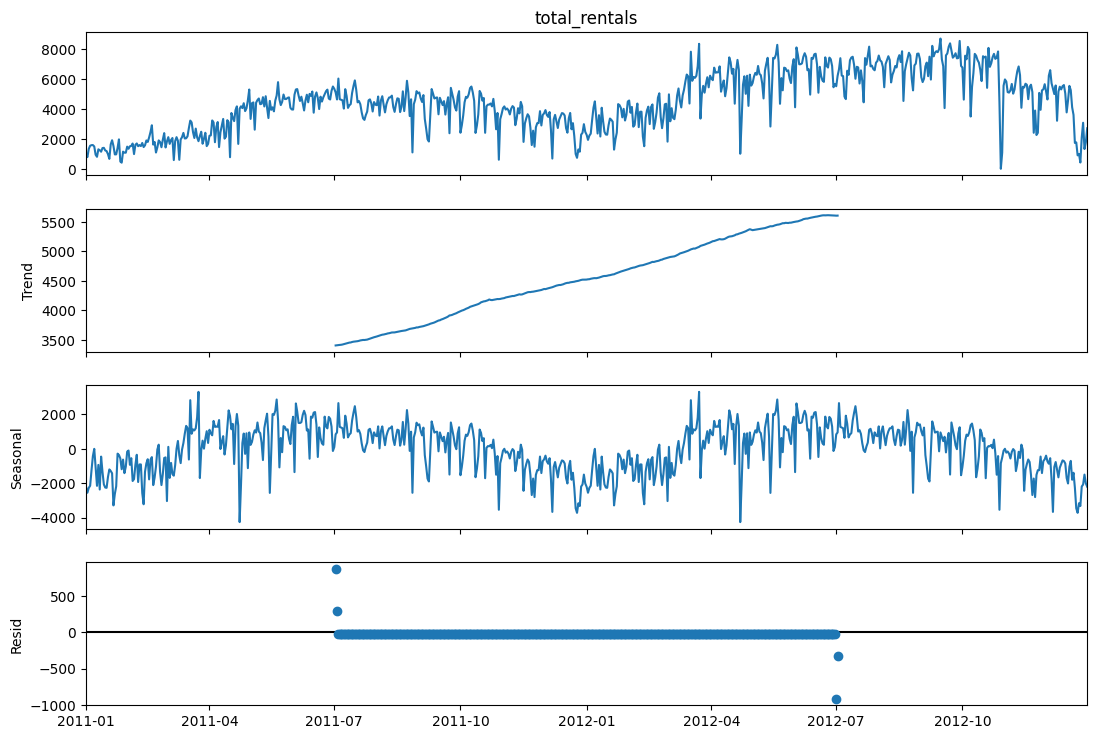

In [ ]:
# data diurutkan
day_df_ts = day_df.set_index('date').sort_index()
result = seasonal_decompose(day_df_ts['total_rentals'], model='additive', period=365) # Periode 365 untuk musim tahunan

fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()

In [ ]:
# Rata-rata sewa harian per musim
avg_rentals_per_season = day_df.groupby('season')['total_rentals'].mean().reset_index()
print("Rata-rata Sewa Harian per Musim:")
print(avg_rentals_per_season)


Rata-rata Sewa Harian per Musim:
   season  total_rentals
0  Spring    2604.132597
1  Summer    4992.331522
2    Fall    5644.303191
3  Winter    4728.162921


<ipython-input-63-e4aad20d51e6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals_per_season = day_df.groupby('season')['total_rentals'].mean().reset_index()


In [ ]:
# Total sewa per hari dalam seminggu untuk pengguna casual vs registered
# Gunakan day_df_users yang memiliki kolom 'user_type' dan 'rental_count'
rentals_by_weekday_usertype = day_df_users.groupby(['weekday', 'user_type'])['rental_count'].sum().reset_index()
print("\nTotal Sewa per Hari dalam Seminggu (Casual vs Registered):")
print(rentals_by_weekday_usertype)


Total Sewa per Hari dalam Seminggu (Casual vs Registered):
      weekday         user_type  rental_count
0      Friday      casual_users         78238
1      Friday  registered_users        409552
2      Monday      casual_users         70784
3      Monday  registered_users        384719
4    Saturday      casual_users        153852
5    Saturday  registered_users        323955
6      Sunday      casual_users        140521
7      Sunday  registered_users        303506
8    Thursday      casual_users         61460
9    Thursday  registered_users        423935
10    Tuesday      casual_users         57843
11    Tuesday  registered_users        411266
12  Wednesday      casual_users         57319
13  Wednesday  registered_users        415729


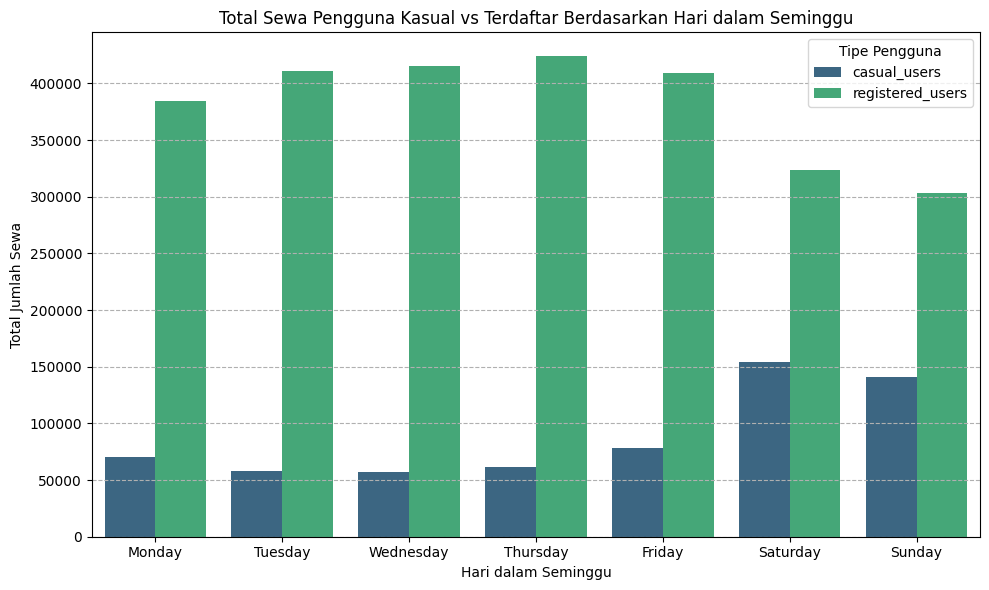

In [ ]:

# Mengurutkan hari dalam seminggu untuk tampilan yang logis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rentals_by_weekday_usertype['weekday'] = pd.Categorical(rentals_by_weekday_usertype['weekday'], categories=weekday_order, ordered=True)
rentals_by_weekday_usertype = rentals_by_weekday_usertype.sort_values('weekday')


# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='rental_count', hue='user_type', data=rentals_by_weekday_usertype, palette='viridis')

plt.title('Total Sewa Pengguna Kasual vs Terdaftar Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Jumlah Sewa')
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1

Tren Musiman Penggunaan Sepeda Berdasarkan Pola Waktu

Berdasarkan analisis visualisasi tren penggunaan sepeda, dapat disimpulkan bahwa terdapat pola musiman dan harian yang signifikan dalam jumlah penyewaan sepeda:

Tren Tahunan: Terlihat peningkatan total sewa sepeda dari tahun 2011 ke tahun 2012. Ini menunjukkan pertumbuhan dalam penggunaan layanan penyewaan sepeda secara keseluruhan selama periode data.
Tren Musiman: Penggunaan sepeda menunjukkan pola musiman yang jelas. Musim gugur (Fall) umumnya memiliki jumlah sewa tertinggi, diikuti oleh musim panas (Summer). Musim semi (Spring) dan musim dingin (Winter) menunjukkan jumlah sewa yang lebih rendah. Ini mengindikasikan bahwa cuaca dan kondisi lingkungan yang lebih baik selama musim panas dan gugur sangat berpengaruh pada permintaan sewa sepeda.
Tren Bulanan: Pola bulanan mencerminkan tren musiman, dengan bulan-bulan di pertengahan tahun (sekitar Mei hingga Oktober) menunjukkan jumlah sewa yang lebih tinggi dibandingkan bulan-bulan di awal dan akhir tahun. Bulan-bulan puncak sewa kemungkinan besar adalah di musim panas dan gugur.
Tren Harian dalam Seminggu: Terdapat perbedaan yang mencolok dalam penggunaan sepeda berdasarkan hari dalam seminggu. Hari Sabtu dan Minggu (akhir pekan) menunjukkan jumlah sewa yang lebih tinggi dibandingkan hari kerja (Senin hingga Jumat). Ini menunjukkan bahwa banyak pengguna memanfaatkan layanan ini untuk aktivitas santai atau rekreasi di akhir pekan.
Tren Harian dari Waktu ke Waktu: Visualisasi tren sewa harian dari waktu ke waktu menunjukkan fluktuasi yang jelas, dengan puncak-puncak yang konsisten di musim-musim yang lebih hangat. Garis tren secara keseluruhan menunjukkan peningkatan dari awal data hingga akhir data, terutama di musim-musim puncak.
Secara keseluruhan, cuaca dan waktu luang (akhir pekan) tampaknya menjadi faktor utama yang mempengaruhi tren penggunaan sepeda. Pola musiman dan harian ini penting untuk dipertimbangkan dalam perencanaan operasional, seperti alokasi sepeda, penjadwalan staf, dan strategi pemasaran.

- Conclution pertanyaan 2

Perbedaan Perilaku Pengguna Terdaftar dan Pengguna Sementara

Berdasarkan analisis visualisasi perbandingan antara pengguna terdaftar (registered_users) dan pengguna sementara (casual_users), terdapat perbedaan perilaku yang mencolok:

Dominasi Pengguna Terdaftar: Secara keseluruhan, jumlah penyewaan oleh pengguna terdaftar jauh lebih tinggi dibandingkan pengguna sementara di hampir semua pola waktu (harian, bulanan, musiman, dan tahunan). Ini menunjukkan bahwa pengguna terdaftar adalah basis pelanggan utama dari layanan penyewaan sepeda ini.
Pola Penggunaan Harian:
Pengguna terdaftar menunjukkan pola penggunaan yang lebih tinggi pada hari kerja (Senin hingga Jumat). Ini kemungkinan besar mencerminkan penggunaan untuk keperluan komuter atau aktivitas rutin lainnya.
Pengguna sementara menunjukkan lonjakan penggunaan yang signifikan pada hari akhir pekan (Sabtu dan Minggu). Ini mengindikasikan bahwa pengguna sementara lebih sering menggunakan sepeda untuk kegiatan rekreasi atau santai di waktu luang.
Pola Penggunaan Bulanan dan Musiman:
Kedua jenis pengguna cenderung memiliki jumlah sewa yang lebih tinggi di bulan-bulan hangat (musim panas dan gugur). Namun, peningkatan pada pengguna sementara di musim-musim puncak terlihat lebih dramatis dibandingkan pengguna terdaftar. Ini memperkuat bahwa pengguna sementara lebih sensitif terhadap kondisi cuaca yang baik.
Pola Penggunaan Jam dalam Sehari (Menggunakan hour_df):
Pengguna terdaftar menunjukkan dua puncak penggunaan yang jelas dalam sehari: pagi hari (sekitar jam 7-9) dan sore/petang hari (sekitar jam 17-19). Ini sangat khas pola penggunaan untuk komuter.
Pengguna sementara menunjukkan pola penggunaan yang lebih merata sepanjang hari, dengan puncak tunggal di sekitar tengah hari hingga sore (sekitar jam 10-16). Ini sesuai dengan penggunaan untuk tujuan rekreasi atau tamasya.
Tren Tahunan: Meskipun kedua jenis pengguna menunjukkan peningkatan jumlah sewa dari tahun 2011 ke 2012, peningkatan absolut pada pengguna terdaftar jauh lebih besar. Ini menunjukkan bahwa upaya akuisisi dan retensi pengguna terdaftar tampaknya lebih berhasil atau basis pengguna terdaftar memang berkembang lebih cepat.



Berdasarkan analisa di atas, dapat disimpulkan beberapa hal:

**Tren Musiman:** Layanan sewa sepeda menunjukkan pola penggunaan yang sangat dipengaruhi oleh musim, dengan puncak di musim gugur dan panas. Hari akhir pekan juga menunjukkan penggunaan yang lebih tinggi.

**Perilaku Pengguna:** Pengguna terdaftar adalah basis pelanggan utama dengan volume sewa yang jauh lebih tinggi. Pola penggunaan harian (jam) dan mingguan (hari) sangat berbeda antara pengguna kasual (lebih ke rekreasi, puncak tengah hari/akhir pekan) dan terdaftar (lebih ke komuter, puncak pagi/sore di hari kerja).

Insight ini sangat penting untuk strategi operasional, pemasaran, dan perencanaan sumber daya untuk layanan sewa sepeda.

In [41]:
day_df.to_csv('day_df.csv', index=False)
hour_df.to_csv('hour_df.csv', index=False)


In [42]:
files.download('day_df.csv')
files.download('hour_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>